# Plot Dot Plot

This notebook will help you generate "Prism-style" dot plots in Python, inspect the distribution of your data, and run two-sample statistics.
<hr>

## Import Data
For this notebook, we can either import our data from a CSV file, or by manually entering the values. 

If you'd like to import your data from a CSV file, you will need to follow the instructions for uploading data to Colab on [the home page](https://bipn145.github.io/intro.html). If you are using this option, comment out the lines of code under Option 2.

> **Task**: 
> 1. Change `data_1` and `data_2` to be your two groups of data. *Make sure you leave these as lists, with brackets on each end, and each data point separated by a comma.*
> 2. *Optional*: Rename `Condition_1` and `Condition_2`. *Make sure you keep these in single quotes, so Python recognizes them as a string!*

In [1]:
# Option 1: Import a CSV file as a Pandas dataframe
import pandas as pd
#filename = ...
#data = pd.read_csv(filename)

# Option 2: Import your data as two lists and generate a dataframe from it
data_1 = [1,3,3,2,1,2,4,2,5]
data_2 = [3,4,5,3,2,6,7,8,3]
data = pd.DataFrame(data={'Condition_1':data_1,'Condition_2':data_2})

# Show the data
data

,Condition_1,Condition_2
0,1,3
1,3,4
2,3,5
3,2,3
4,1,2
5,2,6
6,4,7
7,2,8
8,5,3


## Plot Data
Below, we'll use a seaborn plotting function called [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) to plot each of our data points. 

### Notes 
* This will draw a <font color='gray'>**dotted gray**</font> line for the median, and a **solid black line** for the mean. 
* Change the `plt.ylabel` line to add your own label.

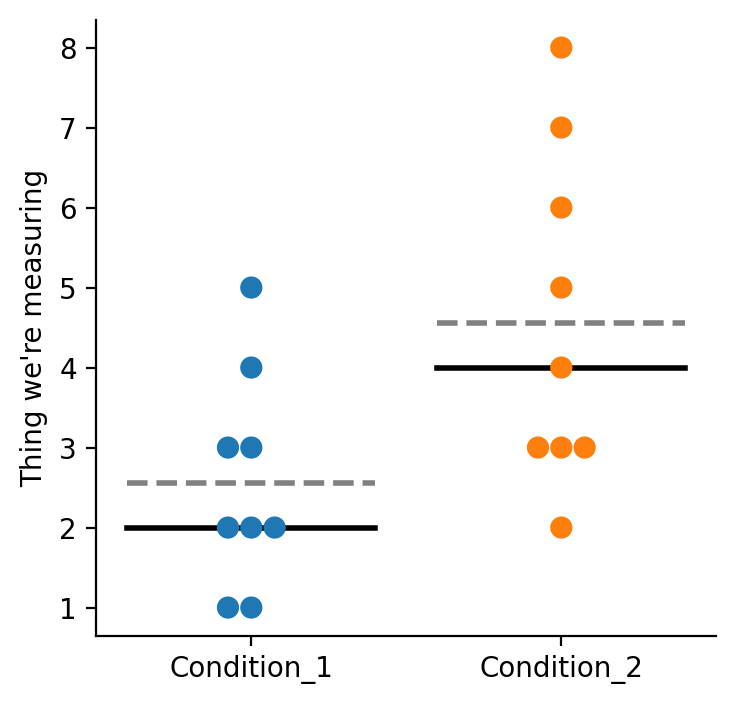

In [2]:
# Import needed packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# Set up the plot
fig,ax = plt.subplots(1,1,figsize=(4,4))

# plot the mean line
sns.boxplot(data=data, showmeans=True,meanline=True,
            meanprops={'color': 'gray', 'ls': '--', 'lw': 2},
            medianprops={'visible': True,'color': 'black', 'ls': '-', 'lw': 2},
            whiskerprops={'visible': False},
            showfliers=False,showbox=False,showcaps=False)

# plot individual data points
sns.swarmplot(data=data,s=8)

plt.ylabel('Thing we\'re measuring')

# Make the axes look nice!
ax.spines[['right', 'top']].set_visible(False)

plt.show()

## Check to see how skewed the data is

Before we run any hypoothesis tests, we need to know if our data is skewed or not. To test for skewness, we can use [`stats.skewtest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest) to test. This method implements the <a href="https://www.jstor.org/stable/2684359?seq=1">D'Agostino-Pearson skewness test</a>, one of many different tests (e.g., the Kolmogorov-Smirov test) that can be used to check the normality of a distribution. **If the skew test gives us a p-value of less than 0.05, the population is skewed.**

>**Task**: Run the cell below, but then change the `sample` to `data_2` (or create a separate cell for `data_2` to test your second group of data points.

The skewtest p-value is 0.346991576561619385898893597187


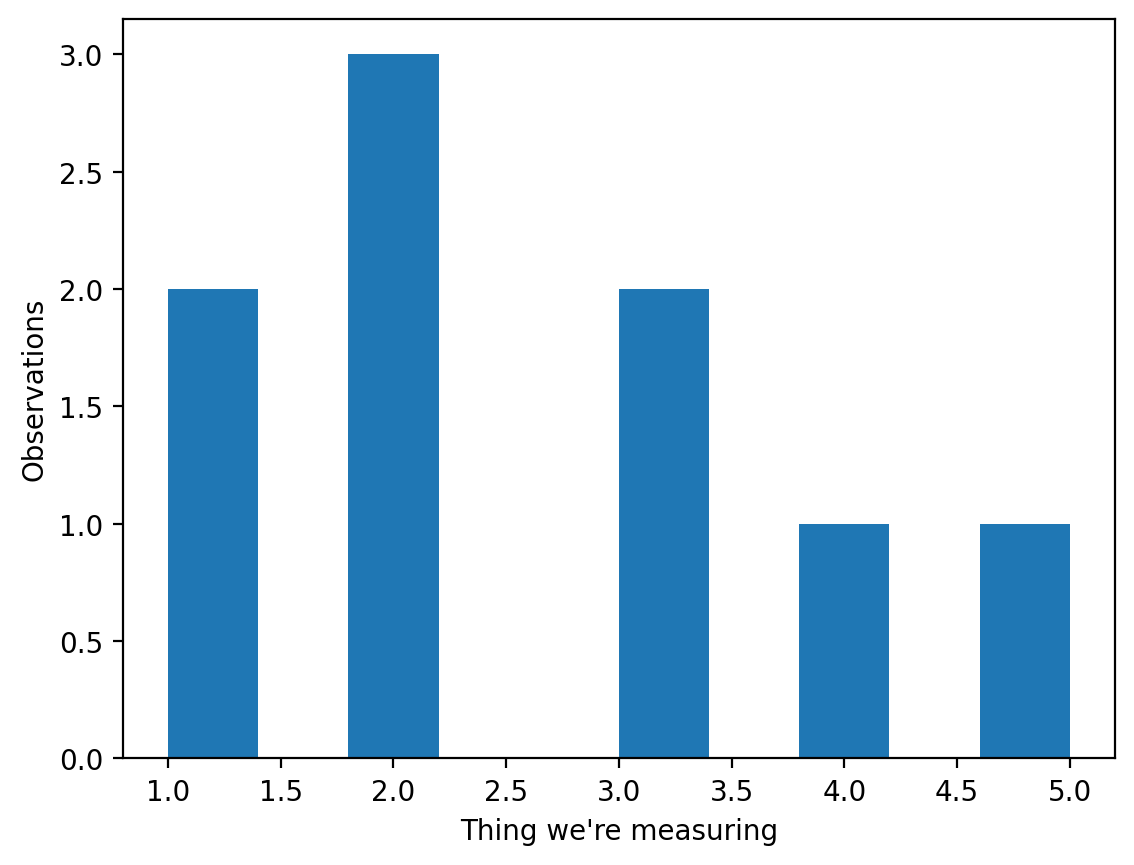

In [3]:
from scipy import stats

sample = data_1 # Choose which data to use

stat,pvalue = stats.skewtest(sample) # Run the skew test

# Print the p value of the skew test up to 30 decimal points
print('The skewtest p-value is ' + '%.30f' % pvalue) 

plt.hist(sample) # Create a histogram
plt.ylabel('Observations')
plt.xlabel('Thing we\'re measuring')
plt.show()

## Run two-sample statistics

### *Inferential statistics* generalize from observed data to the world at large
Most often, the goal of our hypothesis testing is to test whether or not two distributions are different, or if a distribution has a different mean than the underlying population distribution.

The SciPy stats package has [many hypothesis testing tools](https://docs.scipy.org/doc/scipy/reference/stats.html). For many simple cases in biology or neuroscience research, we'd like to test whether two or more distributions are different from eachother.

If we know our distributions are normal (they're generated from a normal distribution!) we can use **parametric statistics** to test our hypothesis. To test for differences between normal populations, we can use the independent t-test in our stats package: `stats.ttest_ind()`.

If we had paired samples, we would use a dependent t-test [as seen here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel).

If one of our populations is skewed, however, we **cannot use a t-test**. A t-test assumes that the populations are normally distributed. For skewed populations, we can use either the [Mann-Whitney U](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) (for independent samples, `stats.mannwhitneyu()`) or the [Wilcoxon Signed Rank Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon) (for dependent/paired samples,`stats.wilcoxon()`).

Below, there is sample code to run three different statistical tests. **You should use *only* the one that is most appropriate for your data by uncommenting that line.**

In [4]:
print(stats.ttest_ind(data_1,data_2)) # to run an independent t-test
# print(stats.ttest_rel(data_1,data_2)) # to run an dependent t-test
# print(stats.mannwhitneyu(data_1,_2)) # to run a mannwhitneyu
# print(stats.wilcoxon(data_1,data_2)) # to run a wilcoxon signed rank test

TtestResult(statistic=-2.4382276613229465, pvalue=0.026796307428331737, df=16.0)
TtestResult(statistic=-2.6832815729997477, pvalue=0.027784351010990083, df=8)


That's it for this notebook! You can adapt this code for lots of different projects (including your final project!).